# Raisin Class Prediction

Data Set Information:

Images of Kecimen and Besni raisin varieties grown in Turkey were obtained with CVS. A total of 900 raisin grains were used, including 450 pieces from both varieties. These images were subjected to various stages of pre-processing and 7 morphological features were extracted. These features have been classified using three different artificial intelligence techniques.


Attribute Information:

1. Area: Gives the number of pixels within the boundaries of the raisin.
2. Perimeter: It measures the environment by calculating the distance between the boundaries of the raisin and the pixels around it.
3. MajorAxisLength: Gives the length of the main axis, which is the longest line that can be drawn on the raisin.
4. MinorAxisLength: Gives the length of the small axis, which is the shortest line that can be drawn on the raisin.
5. Eccentricity: It gives a measure of the eccentricity of the ellipse, which has the same moments as raisins.
6. ConvexArea: Gives the number of pixels of the smallest convex shell of the region formed by the raisin.
7. Extent: Gives the ratio of the region formed by the raisin to the total pixels in the bounding box.
8. Class: Kecimen and Besni raisin.

https://archive.ics.uci.edu/ml/datasets/Raisin+Dataset

# Import libraries

In [1]:
# libraries for EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import cufflinks as cf
#Enabling the offline mode for interactive plotting locally
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
cf.go_offline()
import plotly.io as pio
pio.renderers.default = "colab"
#To display the plots
%matplotlib inline
from ipywidgets import interact

# sklearn library for machine learning algorithms, data preprocessing, and evaluation
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, log_loss, recall_score, accuracy_score, precision_score, f1_score

# yellowbrick library for visualizing the model performance
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.cluster import KElbowVisualizer 

from sklearn.pipeline import Pipeline
# to get rid of the warnings
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

## Exploratory Data Analysis and Visualization

In [2]:
df = pd.read_excel("Raisin_Dataset.xlsx") # Reading the dataset

In [3]:
df.head() 

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             900 non-null    int64  
 1   MajorAxisLength  900 non-null    float64
 2   MinorAxisLength  900 non-null    float64
 3   Eccentricity     900 non-null    float64
 4   ConvexArea       900 non-null    int64  
 5   Extent           900 non-null    float64
 6   Perimeter        900 non-null    float64
 7   Class            900 non-null    object 
dtypes: float64(5), int64(2), object(1)
memory usage: 56.4+ KB


In [5]:
df.shape

(900, 8)

In [6]:
df.duplicated().sum() #No duplicates

0

In [7]:
df.isnull().sum().any() #No missing values

False

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Area,900.0,87804.127778,39002.111390,25387.000000,59348.000000,78902.000000,105028.250000,235047.000000
MajorAxisLength,900.0,430.929950,116.035121,225.629541,345.442898,407.803951,494.187014,997.291941
MinorAxisLength,900.0,254.488133,49.988902,143.710872,219.111126,247.848409,279.888575,492.275279
Eccentricity,900.0,0.781542,0.090318,0.348730,0.741766,0.798846,0.842571,0.962124
ConvexArea,900.0,91186.090000,40769.290132,26139.000000,61513.250000,81651.000000,108375.750000,278217.000000
Extent,900.0,0.699508,0.053468,0.379856,0.670869,0.707367,0.734991,0.835455
Perimeter,900.0,1165.906636,273.764315,619.074000,966.410750,1119.509000,1308.389750,2697.753000


Kecimen    0.5
Besni      0.5
Name: Class, dtype: float64


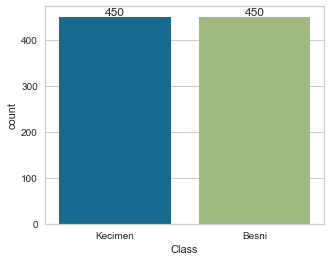

In [9]:
print(df["Class"].value_counts(normalize=True)) # to show the proportion of each class
plt.figure(figsize=(5,4))
ax=sns.countplot(df["Class"])
for container in ax.containers:
    ax.bar_label(container)
    ax.xaxis;

We have prety same amout of classes in the data set. So I can use accuracy as a metric to evaluate the performance of the classifier.

In [10]:
df["Class"] = df["Class"].map({"Kecimen":0,"Besni":1}) # mapping the classes to 0 and 1

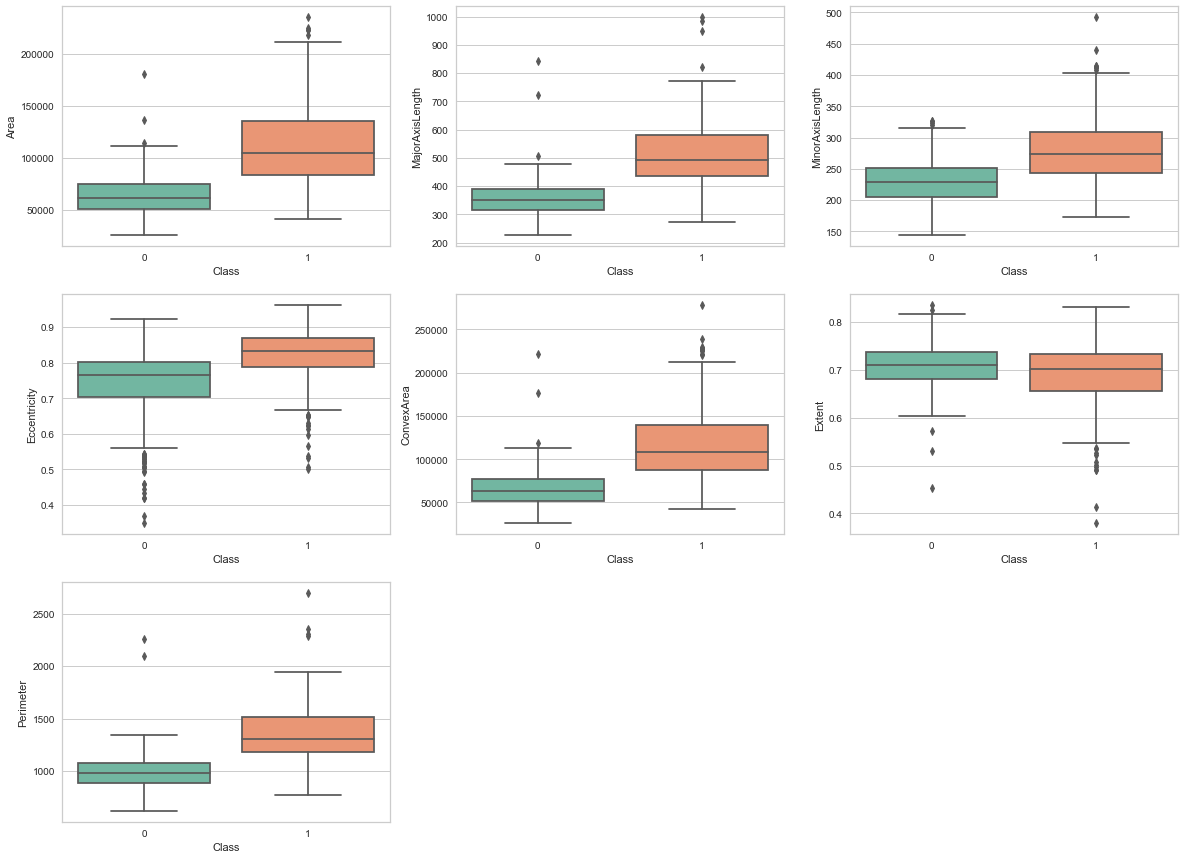

In [11]:
index=1
plt.figure(figsize=(20,15))
for feature in df.columns:
    if feature != 'Class':
        plt.subplot(3,3,index)
        index+=1
        sns.boxplot(x='Class', y=feature, data=df, palette='Set2')

In [12]:
#featurewise box plot  
df.iloc[:,:-1].iplot(kind="box")

In [13]:
#  featurewise box plot with classess
fig = px.box(df, color="Class", color_discrete_map={"Kecimen":'#FF0000',"Besni":'#00FF00'})
fig.show()

In [14]:
df.iloc[:,:-1].iplot(kind="hist")

In [15]:
def histogramer(feature,bins):
    fig = px.histogram(df,x=feature,color="Class",
                   histfunc="avg",nbins=bins,
                   color_discrete_map={"Kecimen":'#FF0000',"Besni":'#00FF00'})
    fig.show()

cols = df.columns 
interact(histogramer, feature = cols,bins=125)

interactive(children=(Dropdown(description='feature', options=('Area', 'MajorAxisLength', 'MinorAxisLength', '…

<function __main__.histogramer(feature, bins)>

<AxesSubplot:>

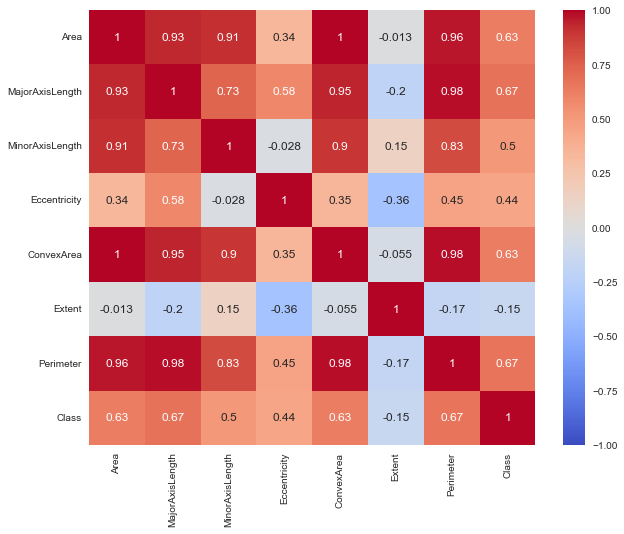

In [16]:
plt.figure(figsize=(10,8))
sns.heatmap(df.select_dtypes(include='number').corr(),vmin=-1,vmax=1, annot=True, cmap='coolwarm')

In [17]:
corr_matrix = df.corr()
fig = px.imshow(corr_matrix)
fig.show()

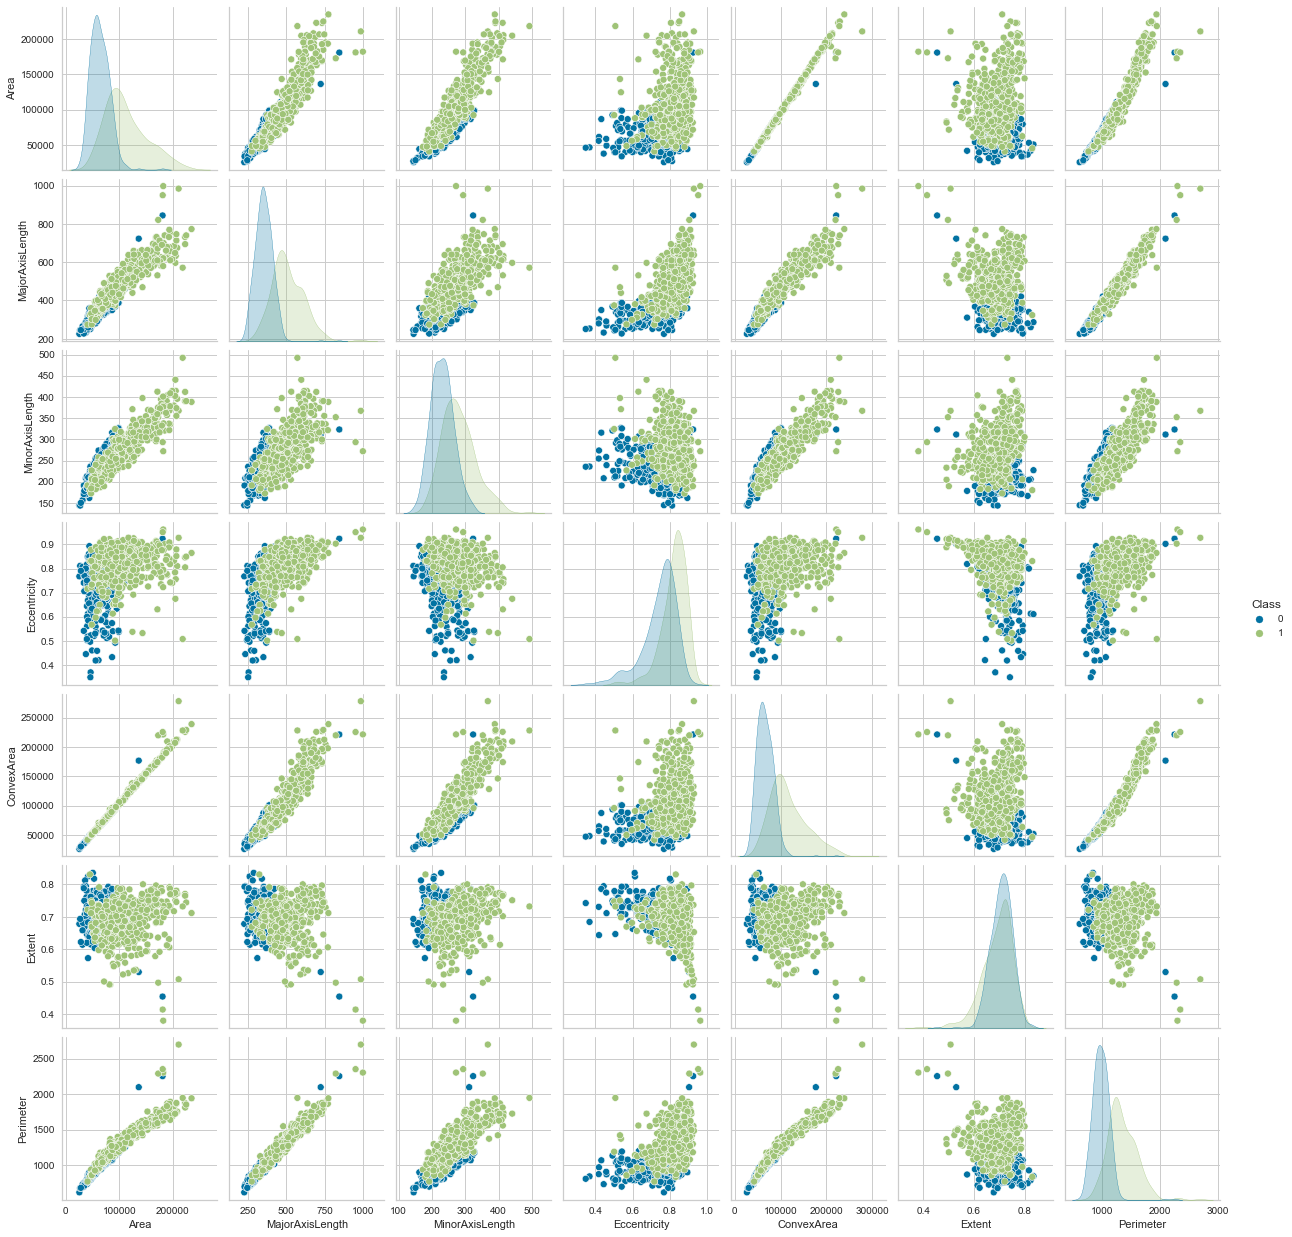

In [18]:
sns.pairplot(df, hue = "Class")

In [19]:
def scatter_3D(xx,yy,zz):
    fig = px.scatter_3d(df, x=xx, y=yy, z=zz,
                        color='Class', )
    fig.show()
    
    
cols = df.columns    
interact(scatter_3D, xx=cols,yy=cols,zz=cols)

interactive(children=(Dropdown(description='xx', options=('Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccen…

<function __main__.scatter_3D(xx, yy, zz)>

## Train | Test Split and Scaling

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             900 non-null    int64  
 1   MajorAxisLength  900 non-null    float64
 2   MinorAxisLength  900 non-null    float64
 3   Eccentricity     900 non-null    float64
 4   ConvexArea       900 non-null    int64  
 5   Extent           900 non-null    float64
 6   Perimeter        900 non-null    float64
 7   Class            900 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 56.4 KB


In [21]:
X=df.drop(["Class"], axis=1)
y=df["Class"]

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y, random_state=10)

In [23]:
scaler =StandardScaler() # will be used in the pipelines

# Logistic Regression

In [24]:
log_model = LogisticRegression() # will be used in the pipelines

In [25]:
log_pipe = Pipeline([("scaler",scaler),("log_model",log_model)]) # pipeline for logistic regression

In [26]:
log_pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('log_model', LogisticRegression())])

In [27]:
y_pred=log_pipe.predict(X_test)

In [28]:
y_pred_proba = log_pipe.predict_proba(X_test)

## Model Performance

In [29]:
def eval_metric(model, X_train, y_train, X_test, y_test):

    """ to get the metrics for the model """

    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [30]:
eval_metric(log_pipe, X_train, y_train, X_test, y_test) # to get the metrics for the model

Test_Set
[[81  9]
 [14 76]]
              precision    recall  f1-score   support

           0       0.85      0.90      0.88        90
           1       0.89      0.84      0.87        90

    accuracy                           0.87       180
   macro avg       0.87      0.87      0.87       180
weighted avg       0.87      0.87      0.87       180


Train_Set
[[317  43]
 [ 53 307]]
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       360
           1       0.88      0.85      0.86       360

    accuracy                           0.87       720
   macro avg       0.87      0.87      0.87       720
weighted avg       0.87      0.87      0.87       720



### Cross Validate

In [31]:
model = Pipeline([("scaler",scaler),("log_model",log_model)])

scores = cross_validate(model, X_train, y_train, scoring = ['precision','recall','f1','accuracy'], cv = 10,error_score="raise")
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

,fit_time,score_time,test_precision,test_recall,test_f1,test_accuracy
1,0.281578,0.007062,0.935484,0.805556,0.865672,0.875000
2,0.032807,0.008174,0.857143,0.833333,0.845070,0.847222
3,0.057835,0.008000,0.842105,0.888889,0.864865,0.861111
4,0.125991,0.007164,0.767442,0.916667,0.835443,0.819444
5,0.018236,0.007054,0.933333,0.777778,0.848485,0.861111
6,0.015920,0.006107,0.903226,0.777778,0.835821,0.847222
7,0.014995,0.004338,0.942857,0.916667,0.929577,0.930556
8,0.013390,0.004342,0.804878,0.916667,0.857143,0.847222
9,0.024827,0.005841,0.857143,0.833333,0.845070,0.847222
10,0.020878,0.007909,0.967742,0.833333,0.895522,0.902778


In [32]:
df_scores.mean()[2:]     

test_precision    0.881135
test_recall       0.850000
test_f1           0.862267
test_accuracy     0.863889
dtype: float64

### GridSearchCV

In [33]:
from sklearn.model_selection import GridSearchCV
# pipeline for logistic regression
model = Pipeline([("scaler",scaler),("log_model",log_model)]) 
# l1: Lasso, l2: Ridge
penalty = ["l1", "l2"] 
# to get 20 values of C between -1 and 5
C = np.logspace(-1, 5, 20) 
# balanced: class weights are balanced, None: no class weights
class_weight= ["balanced", None] 
# to get 4 values of solver
solver = ["lbfgs", "liblinear", "sag", "saga"] 
# to get all the combinations of penalty, C, class_weight and solver
param_grid = {"log_model__penalty" : penalty,
              "log_model__C" : [C,1],
              "log_model__class_weight":class_weight,
              "log_model__solver":solver} 

# to get the best model
grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          cv=10,
                          scoring = 'accuracy',       
                          n_jobs = -1) 

In [34]:
grid_model.fit(X_train,y_train)

/Users/yucelyavuz/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/yucelyavuz/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/yucelyavuz/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/yucelyavuz/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/yucelyavuz/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
Valu

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('log_model', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'log_model__C': [array([1.00000000e-01, 2.06913808e-01, 4.28133240e-01, 8.85866790e-01,
       1.83298071e+00, 3.79269019e+00, 7.84759970e+00, 1.62377674e+01,
       3.35981829e+01, 6.95192796e+01, 1.43844989e+02, 2.97635144e+02,
       6.15848211e+02, 1.27427499e+03, 2.63665090e+03, 5.45559478e+03,
       1.12883789e+04, 2.33572147e+04, 4.83293024e+04, 1.00000000e+05]),
                                          1],
                         'log_model__class_weight': ['balanced', None],
                         'log_model__penalty': ['l1', 'l2'],
                         'log_model__solver': ['lbfgs', 'liblinear', 'sag',
                                               'saga']},
             scoring='accuracy')

In [35]:
grid_model.best_params_ # to get the best parameters according to the best score

{'log_model__C': 1,
 'log_model__class_weight': 'balanced',
 'log_model__penalty': 'l1',
 'log_model__solver': 'liblinear'}

In [36]:
eval_metric(grid_model, X_train, y_train, X_test, y_test)  

# test set accuracy increased 0.87 to 0.88

Test_Set
[[79 11]
 [10 80]]
              precision    recall  f1-score   support

           0       0.89      0.88      0.88        90
           1       0.88      0.89      0.88        90

    accuracy                           0.88       180
   macro avg       0.88      0.88      0.88       180
weighted avg       0.88      0.88      0.88       180


Train_Set
[[316  44]
 [ 53 307]]
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       360
           1       0.87      0.85      0.86       360

    accuracy                           0.87       720
   macro avg       0.87      0.87      0.87       720
weighted avg       0.87      0.87      0.87       720



## ROC (Receiver Operating Curve) and AUC (Area Under Curve)

In [37]:
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, roc_auc_score, auc, roc_curve, average_precision_score, precision_recall_curve

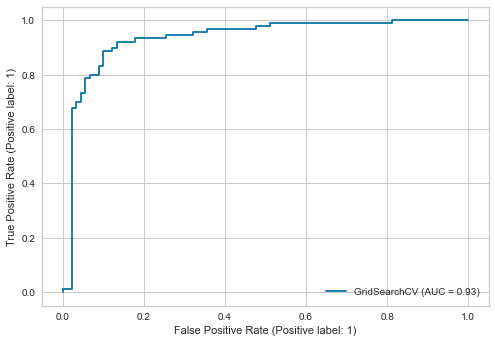

In [38]:
plot_roc_curve(grid_model, X_test, y_test) # we use ROC curve to get the AUC score and evaluate the model if it is good or not on every threshold

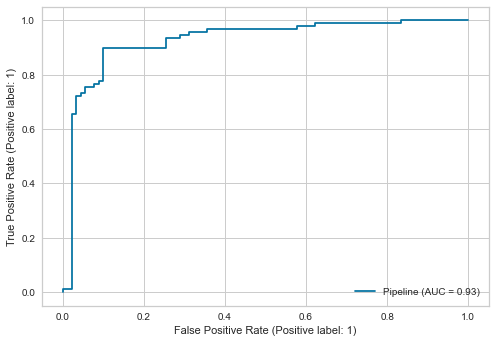

In [39]:
plot_roc_curve(log_pipe, X_test, y_test) 

## KNN

In [40]:
from sklearn.neighbors import KNeighborsClassifier

In [41]:
knn = KNeighborsClassifier()  # to get a object of KNeighborsClassifier for pipeline

In [42]:
knn_pipe = Pipeline([("scaler",scaler),("knn",knn)]) # pipeline for KNeighborsClassifier

In [43]:
knn_pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('knn', KNeighborsClassifier())])

In [44]:
knn_pred = knn_pipe.predict(X_test)

In [45]:
eval_metric(knn_pipe, X_train, y_train, X_test, y_test)

Test_Set
[[80 10]
 [16 74]]
              precision    recall  f1-score   support

           0       0.83      0.89      0.86        90
           1       0.88      0.82      0.85        90

    accuracy                           0.86       180
   macro avg       0.86      0.86      0.86       180
weighted avg       0.86      0.86      0.86       180


Train_Set
[[332  28]
 [ 55 305]]
              precision    recall  f1-score   support

           0       0.86      0.92      0.89       360
           1       0.92      0.85      0.88       360

    accuracy                           0.88       720
   macro avg       0.89      0.88      0.88       720
weighted avg       0.89      0.88      0.88       720



### Elbow Method for Choosing Reasonable K Values

In [46]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

In [47]:
test_error_rates = []


for k in range(1,30):

    model = Pipeline([("scaler",scaler),("knn",KNeighborsClassifier(n_neighbors=k))]) # p=1,weights="uniform",metric="minkowski"

    scores = cross_validate(model, X_train, y_train, scoring = ['accuracy'], cv = 10,error_score="raise")
    
    accuracy_mean = scores["test_accuracy"].mean() 
    
    
    test_error = 1 - accuracy_mean 
    test_error_rates.append(test_error)

In [48]:
test_error_rates1 = []


for k in range(1,30):
    knn_model = Pipeline([("scaler",scaler),("knn",KNeighborsClassifier(n_neighbors=k))])
    knn_model.fit(X_train,y_train) 
   
    y_pred_test = knn_model.predict(X_test)
    
    test_error = 1 - accuracy_score(y_test,y_pred_test)
    test_error_rates1.append(test_error)

Text(0, 0.5, 'Error Rate')

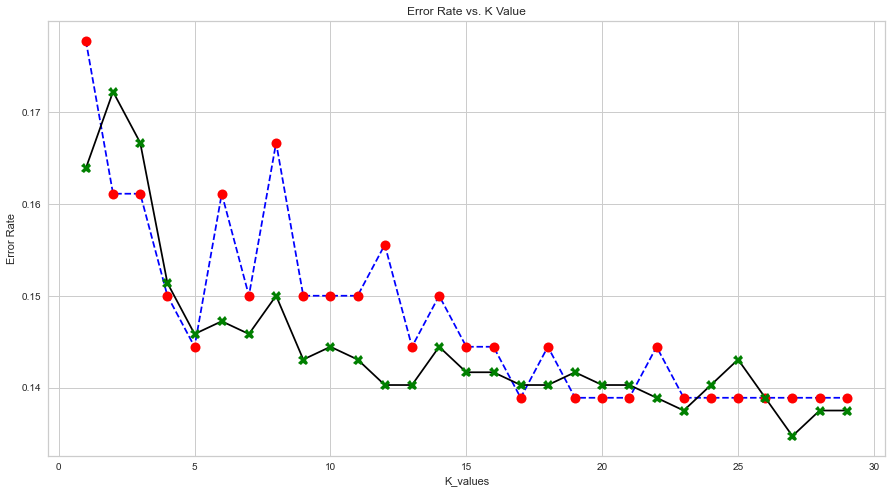

In [49]:
plt.figure(figsize=(15,8))
plt.plot(range(1,30), test_error_rates1, color='blue', linestyle='--', marker='o',
         markerfacecolor='red', markersize=10)
plt.plot(range(1,30), test_error_rates, color='black', linestyle='-', marker='X',
         markerfacecolor='green', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K_values')
plt.ylabel('Error Rate')

### Scores by Various K Values

In [50]:
knn = Pipeline([("scaler",scaler),("knn",KNeighborsClassifier(n_neighbors=2))])
knn.fit(X_train,y_train)
print('WITH K=2\n')
eval_metric(knn, X_train, y_train, X_test, y_test)  

WITH K=2

Test_Set
[[82  8]
 [21 69]]
              precision    recall  f1-score   support

           0       0.80      0.91      0.85        90
           1       0.90      0.77      0.83        90

    accuracy                           0.84       180
   macro avg       0.85      0.84      0.84       180
weighted avg       0.85      0.84      0.84       180


Train_Set
[[360   0]
 [ 60 300]]
              precision    recall  f1-score   support

           0       0.86      1.00      0.92       360
           1       1.00      0.83      0.91       360

    accuracy                           0.92       720
   macro avg       0.93      0.92      0.92       720
weighted avg       0.93      0.92      0.92       720



In [51]:
knn = Pipeline([("scaler",scaler),("knn",KNeighborsClassifier(n_neighbors=8))])

knn.fit(X_train,y_train)
print('WITH K=8\n')
eval_metric(knn, X_train, y_train, X_test, y_test)  

WITH K=8

Test_Set
[[81  9]
 [21 69]]
              precision    recall  f1-score   support

           0       0.79      0.90      0.84        90
           1       0.88      0.77      0.82        90

    accuracy                           0.83       180
   macro avg       0.84      0.83      0.83       180
weighted avg       0.84      0.83      0.83       180


Train_Set
[[338  22]
 [ 68 292]]
              precision    recall  f1-score   support

           0       0.83      0.94      0.88       360
           1       0.93      0.81      0.87       360

    accuracy                           0.88       720
   macro avg       0.88      0.88      0.87       720
weighted avg       0.88      0.88      0.87       720



In [52]:
knn = Pipeline([("scaler",scaler),("knn",KNeighborsClassifier(n_neighbors=25))])

knn.fit(X_train,y_train)
print('WITH 25K=\n')
eval_metric(knn, X_train, y_train, X_test, y_test)

WITH 25K=

Test_Set
[[81  9]
 [16 74]]
              precision    recall  f1-score   support

           0       0.84      0.90      0.87        90
           1       0.89      0.82      0.86        90

    accuracy                           0.86       180
   macro avg       0.86      0.86      0.86       180
weighted avg       0.86      0.86      0.86       180


Train_Set
[[326  34]
 [ 63 297]]
              precision    recall  f1-score   support

           0       0.84      0.91      0.87       360
           1       0.90      0.82      0.86       360

    accuracy                           0.87       720
   macro avg       0.87      0.87      0.87       720
weighted avg       0.87      0.87      0.87       720



In [53]:
knn = Pipeline([("scaler",scaler),("knn",KNeighborsClassifier(n_neighbors=5))])   
knn.fit(X_train,y_train)
print('WITH 5K=\n')
eval_metric(knn, X_train, y_train, X_test, y_test)

WITH 5K=

Test_Set
[[80 10]
 [16 74]]
              precision    recall  f1-score   support

           0       0.83      0.89      0.86        90
           1       0.88      0.82      0.85        90

    accuracy                           0.86       180
   macro avg       0.86      0.86      0.86       180
weighted avg       0.86      0.86      0.86       180


Train_Set
[[332  28]
 [ 55 305]]
              precision    recall  f1-score   support

           0       0.86      0.92      0.89       360
           1       0.92      0.85      0.88       360

    accuracy                           0.88       720
   macro avg       0.89      0.88      0.88       720
weighted avg       0.89      0.88      0.88       720



### Cross Validate

In [54]:
model =Pipeline([("scaler",scaler),("knn",KNeighborsClassifier(n_neighbors=5))])

scores = cross_validate(model, X_train, y_train, scoring = ['precision','recall','f1','accuracy'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

,fit_time,score_time,test_precision,test_recall,test_f1,test_accuracy
1,0.010228,0.021656,0.962963,0.722222,0.825397,0.847222
2,0.009798,0.020090,0.862069,0.694444,0.769231,0.791667
3,0.010057,0.014981,0.833333,0.833333,0.833333,0.833333
4,0.006996,0.015402,0.794872,0.861111,0.826667,0.819444
5,0.010145,0.016155,0.965517,0.777778,0.861538,0.875000
6,0.008599,0.014357,0.909091,0.833333,0.869565,0.875000
7,0.008852,0.013920,0.882353,0.833333,0.857143,0.861111
8,0.005714,0.012786,0.882353,0.833333,0.857143,0.861111
9,0.009438,0.013424,0.861111,0.861111,0.861111,0.861111
10,0.007392,0.011961,1.000000,0.833333,0.909091,0.916667


In [55]:
df_scores.mean()[2:]        

test_precision    0.895366
test_recall       0.808333
test_f1           0.847022
test_accuracy     0.854167
dtype: float64

In [56]:
knn = Pipeline([("scaler",scaler),("knn",KNeighborsClassifier(n_neighbors=5))])   # test_accuracy:    0.86 , train_accuracy :  0.88
                                              
                                                                                  # test_accuracy     0.85  (cross validation)
                                            
                                                                                  # (k=5 with elbow) with 26 wrong prediction
knn.fit(X_train,y_train)
print('WITH K=5\n')
eval_metric(knn, X_train, y_train, X_test, y_test)  

WITH K=5

Test_Set
[[80 10]
 [16 74]]
              precision    recall  f1-score   support

           0       0.83      0.89      0.86        90
           1       0.88      0.82      0.85        90

    accuracy                           0.86       180
   macro avg       0.86      0.86      0.86       180
weighted avg       0.86      0.86      0.86       180


Train_Set
[[332  28]
 [ 55 305]]
              precision    recall  f1-score   support

           0       0.86      0.92      0.89       360
           1       0.92      0.85      0.88       360

    accuracy                           0.88       720
   macro avg       0.89      0.88      0.88       720
weighted avg       0.89      0.88      0.88       720




### Gridsearch Method for Choosing Reasonable K Values

In [57]:
# pipeline for KNeighborsClassifier
knn_grid = Pipeline([("scaler",scaler),("knn",KNeighborsClassifier())]) 
# to get all the values of k between 1 and 30
k_values= range(1,30) 
# to get the values of weight
weight = ['uniform', 'distance'] 
# to get the values of p
p = [1,2] 
# to get the values of metric
metric = ['minkowski'] 
# to get all the combinations of k, weight, p and metric
param_grid = {'knn__n_neighbors': k_values,
              'knn__weights': weight, 
              'knn__p': p, 
              'knn__metric': metric} 
# to get the best model according to the best score
knn_grid_model = GridSearchCV(estimator= knn_grid, 
                             param_grid=param_grid,
                             cv=10, 
                             scoring= 'accuracy',
                             n_jobs=-1) 

In [58]:
knn_grid_model.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'knn__metric': ['minkowski'],
                         'knn__n_neighbors': range(1, 30), 'knn__p': [1, 2],
                         'knn__weights': ['uniform', 'distance']},
             scoring='accuracy')

In [59]:
knn_grid_model.best_params_ # to get the best parameters according to the best score

{'knn__metric': 'minkowski',
 'knn__n_neighbors': 14,
 'knn__p': 1,
 'knn__weights': 'uniform'}

In [60]:
print('WITH K=14\n')      #  knn      test_accuracy :   0.85  (k=14 with gridsearch) with 27 wrong prediction

                          #  knn      test_accuracy :   0.86  (k=5 with elbow) with 26 wrong prediction
eval_metric(knn_grid_model, X_train, y_train, X_test, y_test)

WITH K=14

Test_Set
[[81  9]
 [18 72]]
              precision    recall  f1-score   support

           0       0.82      0.90      0.86        90
           1       0.89      0.80      0.84        90

    accuracy                           0.85       180
   macro avg       0.85      0.85      0.85       180
weighted avg       0.85      0.85      0.85       180


Train_Set
[[334  26]
 [ 66 294]]
              precision    recall  f1-score   support

           0       0.83      0.93      0.88       360
           1       0.92      0.82      0.86       360

    accuracy                           0.87       720
   macro avg       0.88      0.87      0.87       720
weighted avg       0.88      0.87      0.87       720



### Evaluating ROC Curves and AUC

In [61]:
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve, plot_roc_curve, roc_auc_score, roc_curve

In [62]:
model = KNeighborsClassifier(n_neighbors=14, p=1, metric="minkowski", weights="uniform") # best gridsearch model
 
knn_model = Pipeline([("scaler",scaler),("knn",model)])

knn_model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=14, p=1))])

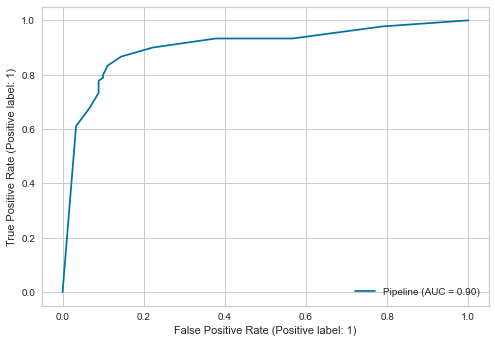

In [63]:
# 0.85  (k=14 with gridsearch) with 27 wrong prediction
plot_roc_curve(knn_model, X_test, y_test) 

In [64]:
y_pred_proba = knn_model.predict_proba(X_test)
roc_auc_score(y_test, y_pred_proba[:,1])

0.9021604938271606

In [65]:
model = KNeighborsClassifier(n_neighbors=5) # best elbow model

knn_model = Pipeline([("scaler",scaler),("knn",model)])

knn_model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('knn', KNeighborsClassifier())])

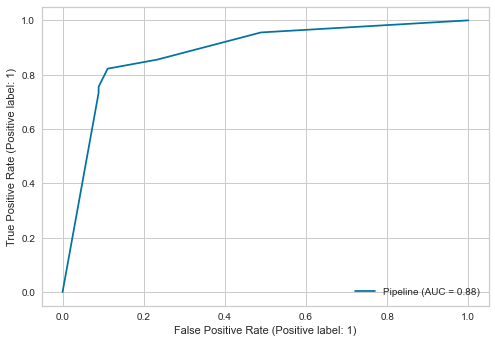

In [66]:
#  knn test_accuracy :   0.86  (k=5 with elbow)  with 26 wrong prediction
plot_roc_curve(knn_model, X_test, y_test)  

# Conclusion 

* log_model Accuracy Score: 0.88 
* log_model AUC : 0.93           

* knn Accuracy Score :   0.86  (k=5 with elbow)  - 0.85  (k=14 with gridsearch)
* knn AUC : 0.88 (elbow) - 0.90 (gridsearch)

* As a conclusion we aplied two models to predict raisins classes and we got prety decent scores both of them
* We decided to use the Logistic Model because of its slightly better score than the knn models, plus the interpretability of logistic regression and its lower computational cost.